In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
sns.set(style='white')

In [3]:
def get_subplot_dimensions(N, max_columns=None):
    if max_columns is None or N <= max_columns:
        # If max_columns is not specified or N is less than or equal to max_columns,
        # then the number of columns required is equal to N.
        # In this case, the number of rows required is 1.
        return 1, N

    # If N is greater wthan max_columns, we need to calculate the number of rows required.
    rows = math.ceil(N / max_columns)
    cols = max_columns

    return rows, cols

In [4]:
RESULTS_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/metrics"
FIGURES_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/metrics"

In [5]:
# effects = ['overdrive', 'multiband', 'ambience', 'delay']

In [6]:
cols = ['dafx', 'pesq', 'mrstft']

In [7]:
vctk_tr = pd.read_csv(f"{RESULTS_DIR}/vctk.csv", index_col=0)[cols]
daps_tr = pd.read_csv(f"{RESULTS_DIR}/daps.csv", index_col=0)[cols]
musdb_tr = pd.read_csv(f"{RESULTS_DIR}/musdb18.csv", index_col=0)[cols]

In [8]:
vctk_ut = pd.read_csv(f"{RESULTS_DIR}/vctk_untrained.csv", index_col=0)[cols]
daps_ut = pd.read_csv(f"{RESULTS_DIR}/daps_untrained.csv", index_col=0)[cols]
musdb_ut = pd.read_csv(f"{RESULTS_DIR}/musdb18_untrained.csv", index_col=0)[cols]

In [9]:
# Combine the dataframes
data = {
    'VCTK': {'Trained': vctk_tr, 'Untrained': vctk_ut},
    'DAPS': {'Trained': daps_tr, 'Untrained': daps_ut},
    'MusDB18': {'Trained': musdb_tr, 'Untrained': musdb_ut}
}

# Create a multi-level column index
columns = pd.MultiIndex.from_product([data.keys(), ['Trained', 'Untrained'], ['MRSTFT', 'PESQ']],
                                     names=['Dataset', 'Encoder', 'Metric'])

# Create the final dataframe
df = pd.DataFrame(columns=columns)

# Fill the dataframe with mean values
for dataset, encoders in data.items():
    for encoder, df_data in encoders.items():
        mean_values = df_data.groupby('dafx').mean().squeeze()
#         std_values = df_data.groupby('dafx').std().squeeze()
        df[(dataset, encoder, 'MRSTFT')] = mean_values['mrstft']
        df[(dataset, encoder, 'PESQ')] = mean_values['pesq']
#         df[(dataset, encoder, 'MRSTFT_std')] = std_values['mrstft']
#         df[(dataset, encoder, 'PESQ_std')] = std_values['pesq']

In [10]:
df.round(3)

Dataset      VCTK                            DAPS                          \
Encoder   Trained        Untrained        Trained        Untrained          
Metric     MRSTFT   PESQ    MRSTFT   PESQ  MRSTFT   PESQ    MRSTFT   PESQ   
dafx                                                                        
ambience    0.525  2.625     0.600  2.027   0.545  2.407     0.650  1.742   
combo       1.055  3.403     1.525  3.609   1.048  3.378     1.534  3.564   
delay       1.078  1.611     1.218  1.306   1.028  1.534     1.152  1.203   
dynamics    0.701  4.207     0.803  3.957   0.648  4.209     0.799  3.925   
flanger     0.696  2.386     0.806  1.670   0.742  2.039     0.880  1.446   
leslie      0.621  3.316     0.641  2.990   0.607  3.133     0.657  2.683   
multiband   0.492  4.451     0.608  4.373   0.472  4.486     0.602  4.398   
overdrive   0.640  4.224     0.794  4.014   0.639  4.213     0.882  4.059   
ringmod     1.621  1.148     1.712  1.120   1.856  1.097     1.988  1.078   

Dataset   MusDB18                          
Encoder   Trained        Untrained         
Metric     MRSTFT   PESQ    MRSTFT   PESQ  
dafx                                       
ambience    0.518  2.780     0.646  1.805  
combo       1.040  3.689     1.518  3.736  
delay       0.765  2.324     0.905  1.475  
dynamics    0.554  4.177     1.062  3.707  
flanger     0.748  2.339     0.920  1.450  
leslie      0.727  2.518     0.791  2.117  
multiband   0.725  4.272     0.888  4.134  
overdrive   0.797  4.221     1.101  4.040  
ringmod     2.410  1.090     2.598  1.088

In [11]:
# Combine the dataframes
data = {
    'VCTK': {'Trained': vctk_tr, 'Untrained': vctk_ut},
    'DAPS': {'Trained': daps_tr, 'Untrained': daps_ut},
    'MusDB18': {'Trained': musdb_tr, 'Untrained': musdb_ut}
}

# Create a multi-level column index
columns = pd.MultiIndex.from_product([data.keys(), ['Trained', 'Untrained']],
                                     names=['Dataset', 'Encoder'])

# Create dataframes for MRSTFT and PESQ
df_mrstft = pd.DataFrame(columns=columns)
df_pesq = pd.DataFrame(columns=columns)

# Fill the dataframes with mean values
for dataset, encoders in data.items():
    for encoder, df_data in encoders.items():
        mean_values = df_data.groupby('dafx').mean().squeeze()
        df_mrstft[(dataset, encoder)] = mean_values['mrstft']
        df_pesq[(dataset, encoder)] = mean_values['pesq']


In [12]:
df_mrstft

Dataset        VCTK                DAPS             MusDB18          
Encoder     Trained Untrained   Trained Untrained   Trained Untrained
dafx                                                                 
ambience   0.524781  0.599844  0.545256  0.650081  0.518395  0.646419
combo      1.054947  1.525082  1.048086  1.533506  1.040168  1.518171
delay      1.077613  1.217701  1.028197  1.151661  0.765226  0.904907
dynamics   0.700966  0.803341  0.648123  0.799131  0.554029  1.062168
flanger    0.695547  0.806181  0.742375  0.880433  0.748175  0.919931
leslie     0.621029  0.640585  0.606725  0.657210  0.727474  0.791078
multiband  0.491711  0.607969  0.471675  0.602214  0.724658  0.887711
overdrive  0.639782  0.794331  0.639211  0.882419  0.796537  1.100730
ringmod    1.620978  1.711535  1.855569  1.987689  2.410170  2.597987

In [13]:
df_mrstft.to_csv(f"{RESULTS_DIR}/mrstft_combined.csv")

In [14]:
df_pesq

Dataset        VCTK                DAPS             MusDB18          
Encoder     Trained Untrained   Trained Untrained   Trained Untrained
dafx                                                                 
ambience   2.625376  2.027414  2.406652  1.742476  2.780129  1.804628
combo      3.403186  3.608818  3.378133  3.563605  3.688783  3.735831
delay      1.611228  1.305687  1.533843  1.202558  2.323957  1.474919
dynamics   4.206596  3.956969  4.209182  3.925282  4.177324  3.706907
flanger    2.386474  1.669819  2.038658  1.446398  2.339116  1.450368
leslie     3.315956  2.990375  3.132514  2.683446  2.518093  2.117010
multiband  4.450827  4.372707  4.485744  4.397561  4.272136  4.133528
overdrive  4.223743  4.013588  4.213151  4.058883  4.221102  4.039799
ringmod    1.148126  1.120443  1.097153  1.077929  1.090464  1.088484

In [15]:
df_pesq.to_csv(f"{RESULTS_DIR}/pesq_combined.csv")

In [16]:
import json

max_cols = 3

effects = ['multiband', 'ambience', 'leslie', 'overdrive', 'flanger', 'dynamics',
       'combo', 'delay', 'ringmod']

dfs = [vctk, daps, musdb]
dataset_names = ["VCTK", "DAPS", "MusDB18"]
metrics = ['mrstft', 'pesq']

rows, cols = get_subplot_dimensions(6, max_columns=max_cols)

palette = sns.color_palette(n_colors=len(effects)).as_hex()
colour_map = {name: palette[i] for i, name in enumerate(effects)}

format_map = {
    'multiband': 'MultiBand',
    'ambience': 'Ambience',
    'leslie': 'Leslie',
    'overdrive': 'Overdrive',
    'flanger': 'Flanger',
    'dynamics': 'Dynamics',
    'combo': 'Combo',
    'delay': 'Delay',
    'ringmod': 'RingMod'
}

large_font = 12
small_font = 10

print(json.dumps(colour_map, indent=4))

NameError: name 'vctk' is not defined

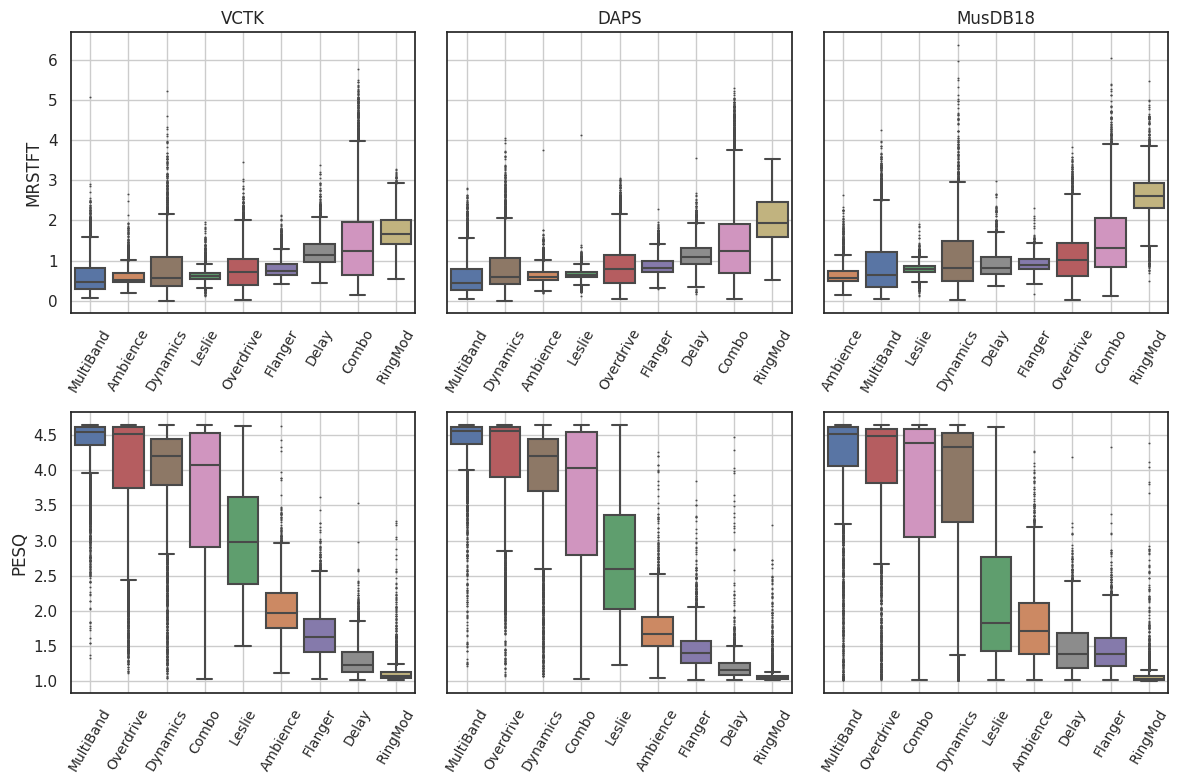

In [15]:
sns.set(style='white')

fig, axs = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharey='row')

for i in range(6):
    row_idx, col_idx = divmod(i, cols)
    
    df = dfs[col_idx]
    metric = metrics[row_idx]

    if rows == 1:
            current_ax = axs[col_idx]
    elif cols == 1:
        current_ax = axs[row_idx]
    else:
        current_ax = axs[row_idx, col_idx]
    
    if metric == 'mrstft':
        order = df.groupby(by=["dafx"]).median().sort_values('mrstft').index
    elif metric == 'pesq':
        order = df.groupby(by=["dafx"]).median().sort_values('pesq').iloc[::-1].index
        
    my_colours = [colour_map[fx] for fx in order]
    sns.set_palette(my_colours)
    
    sns.boxplot(df, x='dafx', y=metric, ax=current_ax, order=order, fliersize=.5)
    labels = [format_map[x] for x in order]
    current_ax.set_xticklabels(labels, rotation=60, fontsize=small_font)
#     current_ax.set_xticklabels([])
    current_ax.set_xlabel("")
    
    current_ax.yaxis.grid(True) # Hide the horizontal gridlines
    current_ax.xaxis.grid(True) # Show the vertical gridlines
    
    if row_idx == 0:
        current_ax.set_title(dataset_names[col_idx], fontsize=large_font)
        
    if col_idx != 0:
        current_ax.set_ylabel("")
    else:
        current_ax.set_ylabel(metrics[row_idx].upper(), fontsize=large_font)

handles = []
for fx in effects:
    patch = mpatches.Patch(color=colour_map[fx], label=fx.title())
    handles.append(patch)

sns.set()

plt.tight_layout()
# fig.subplots_adjust(bottom=0.2)

# fig.legend(handles=handles, loc="lower center", ncol=5, frameon=False)
# plt.savefig(f"{FIGURES_DIR}/metrics_with_untrained.pdf")
plt.show()

In [61]:
low_metrics = [
    'mrstft', # multi-resolution spectrogram error (general perception of similarity)
    'msd', # mel-spectral difference (equalisation similarity)
    'sce', # spectral-centroid error (equalisation similarity)
    'cfe', # crest-factor error (dynamics)
    'rms', # rms energy error (dynamics)
    'lufs' # loudness error (dynamics)
]
high_metrics = [
    'pesq' # perceptual evaluation of speech quality (general perceptual similarity)
] 

In [62]:
vtck_mean = vtck.groupby('dafx').mean().sort_values('mrstft')
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(vtck_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
multiband,4.450827,0.491711
ambience,2.625376,0.524781
leslie,3.315956,0.621029
overdrive,4.223743,0.639782
flanger,2.386474,0.695547
dynamics,4.206596,0.700966
combo,3.403186,1.054947
delay,1.611228,1.077613
ringmod,1.148126,1.620978


In [145]:
current_ax.get_legend_handles_labels()

([], [])

In [33]:
daps_mean = daps.groupby('dafx').mean()
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(daps_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
ambience,2.406652,0.545256
combo,3.378133,1.048086
delay,1.533843,1.028197
dynamics,4.209182,0.648123
flanger,2.038658,0.742375
leslie,3.132514,0.606725
multiband,4.485744,0.471675
overdrive,4.213151,0.639211
ringmod,1.097153,1.855569


In [34]:
mus_mean = musdb.groupby('dafx').mean()
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(mus_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
ambience,2.780129,0.518395
combo,3.688783,1.040168
delay,2.323957,0.765226
dynamics,4.177324,0.554029
flanger,2.339116,0.748175
leslie,2.518093,0.727474
multiband,4.272136,0.724658
overdrive,4.221102,0.796537
ringmod,1.090464,2.410170
